In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from jax import vmap, jit
import matplotlib.pyplot as plt
import joblib
from qdots_qll.models import game
from qdots_qll import all_funcs
import seaborn as sns
import pandas as pd
import scipy

In [2]:
run_results = joblib.load("../results/run_2024-01-15_16:20:40_results.job")
run_model = joblib.load("../results/run_2024-01-15_16:20:40_model.job")

In [3]:
run_results

Run(
  iteration=i32[2],
  key=u32[2,2],
  weights=f32[2,1000],
  particles_locations=f32[2,1000,4],
  max_iterations=i32[2],
  min_iterations=i32[2],
  std_threshold=f32[2],
  cov_array=f32[2,1000,4,4],
  estimates_array=f32[2,1000,4],
  times_array=f32[2,1000]
)

In [4]:
true_parameters = game.true_pars

In [5]:
run_results.times_array[0][1:140]

Array([22.19428   ,  1.2474216 , 29.333118  ,  6.9569254 ,  5.058925  ,
       11.447665  ,  7.649911  , 34.562706  ,  9.73785   ,  7.598969  ,
       33.36088   , 32.482788  , 24.262283  , 17.17775   , 11.269831  ,
       10.352859  ,  2.829596  , 28.748919  ,  9.694683  ,  0.9284496 ,
       21.624765  , 30.306023  ,  3.1590273 , 17.545256  ,  8.387728  ,
        9.100669  , 33.845253  ,  4.400115  ,  9.916042  , 36.532455  ,
       18.56661   , 33.5048    , 36.97512   , 19.25324   ,  8.04235   ,
       30.023882  , 16.344904  , 31.994295  , 37.586143  ,  0.4982164 ,
        2.9726734 , 23.156263  ,  1.5235701 , 13.210716  , 33.22947   ,
       10.830187  , 28.27591   , 36.464336  , 15.774196  , 29.66303   ,
       11.788409  , 33.237137  , 30.944706  , 10.807929  , 27.621738  ,
       33.467964  ,  2.7347198 ,  2.3440683 ,  8.580464  , 36.825325  ,
       16.246323  , 38.02743   , 21.78839   , 24.240078  , 11.16799   ,
        7.9058943 , 34.86908   ,  4.3485675 , 27.257301  , 24.55

In [6]:
all_funcs.initialize_weights(2000)

Array([0.0005, 0.0005, 0.0005, ..., 0.0005, 0.0005, 0.0005], dtype=float32)

In [7]:
run_results.particles_locations[0].shape

(1000, 4)

In [8]:
jnp.linalg.norm(run_results.cov_array[0])

Array(0.31787816, dtype=float32)

In [9]:
run_results.weights[0].shape[0]

1000

In [10]:
run_results.estimates_array[0][0:100]

Array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.346887  ,  0.51230645,  0.1309972 , -0.55543286],
       [ 0.31928092,  0.50737685,  0.13040236, -0.53075325],
       [ 0.40684575,  0.42264304,  0.12591368, -0.50215876],
       [ 0.43495125,  0.45653892,  0.11411072, -0.4410308 ],
       [ 0.3576816 ,  0.39310768,  0.10895123, -0.4165368 ],
       [ 0.2653063 ,  0.39309448,  0.10255727, -0.33432394],
       [ 0.29943877,  0.35821488,  0.10699081, -0.32993042],
       [ 0.3573544 ,  0.37932503,  0.11102167, -0.3591386 ],
       [ 0.38395363,  0.48341244,  0.10646391, -0.33408135],
       [ 0.34576488,  0.43998164,  0.10556216, -0.42193675],
       [ 0.3513446 ,  0.48620415,  0.09666339, -0.38902694],
       [ 0.32537037,  0.4886623 ,  0.09540106, -0.3751185 ],
       [ 0.30827963,  0.5004132 ,  0.08468324, -0.33276844],
       [ 0.2842715 ,  0.51416934,  0.07754019, -0.29454863],
       [ 0.29975462,  0.5677769 ,  0.07133482, -0.28449124],
       [ 0.34260738,  0.

In [11]:
run_results.times_array[2]

Array([ 0.        , 33.004208  ,  2.8135593 , 25.27356   , 14.017772  ,
       26.10158   , 27.968575  , 34.368893  ,  7.6335692 ,  1.958537  ,
       36.803017  , 23.508345  , 39.10927   ,  1.096836  , 17.123785  ,
       29.593744  , 26.871323  , 20.784636  , 27.49311   ,  1.0188448 ,
       39.596485  , 24.868439  , 12.700657  , 20.1028    , 16.398777  ,
       11.115422  , 33.392788  , 20.5493    ,  2.4796898 , 13.532406  ,
       38.608955  , 10.1026535 , 39.93589   ,  6.498313  , 25.111938  ,
        0.6350106 , 31.533386  , 12.67071   ,  3.193432  ,  7.8612494 ,
        3.8441615 , 17.550676  , 25.258219  , 29.250097  , 20.047953  ,
        4.3786626 , 26.956264  , 11.839271  , 34.84144   ,  7.5880857 ,
        0.566306  , 27.698309  , 28.31791   , 23.534864  ,  8.155642  ,
        6.8816705 , 35.643562  , 37.9613    , 19.700197  , 32.902664  ,
       24.634752  , 18.950087  , 35.94541   ,  8.518567  , 34.496544  ,
       14.338627  , 35.21487   , 18.78275   ,  8.388647  , 39.04

In [12]:
run_results.estimates_array[0][0:4]

Array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.346887  ,  0.51230645,  0.1309972 , -0.55543286],
       [ 0.31928092,  0.50737685,  0.13040236, -0.53075325],
       [ 0.40684575,  0.42264304,  0.12591368, -0.50215876]],      dtype=float32)

In [13]:
run_results.particles_locations[3][0:4]

Array([[ 0.30954096,  0.32643655,  0.09144458, -0.2950554 ],
       [ 0.30314323,  0.33265558,  0.08122288, -0.2841355 ],
       [ 0.29579407,  0.3066574 ,  0.08048297, -0.27712765],
       [ 0.29782772,  0.30895913,  0.05418967, -0.338285  ]],      dtype=float32)

In [14]:
run_results.weights[0]

Array([4.35058573e-05, 1.09839661e-03, 1.21797668e-04, 4.14617563e-04,
       1.24615675e-03, 5.81369095e-04, 1.84237526e-03, 6.18511636e-04,
       5.16671207e-05, 1.75692060e-03, 1.08147739e-03, 1.82318606e-03,
       6.70267327e-04, 1.33870242e-04, 2.96624377e-04, 1.11834658e-03,
       6.55900571e-04, 1.97758852e-03, 1.05055864e-03, 1.80075716e-04,
       1.55615469e-03, 9.60997306e-04, 1.93690998e-04, 1.95707614e-03,
       1.89352699e-03, 1.13545998e-03, 2.52756034e-03, 3.94191826e-04,
       2.83803733e-04, 1.72814936e-04, 3.50732036e-04, 6.00600615e-04,
       3.21555344e-05, 2.56019732e-04, 7.12397567e-04, 2.00734264e-03,
       1.17490801e-03, 1.83254643e-03, 5.62414061e-04, 1.37792493e-03,
       2.47715111e-03, 1.70219224e-03, 5.27582073e-04, 5.57640567e-04,
       2.08012498e-04, 1.33991125e-03, 1.07301027e-03, 2.08617747e-03,
       1.89866999e-03, 5.24955918e-04, 8.90842639e-04, 1.42798328e-03,
       2.71578995e-03, 6.38178899e-04, 2.35145865e-03, 2.28931662e-03,
      

In [15]:
run_results.particles_locations[0]

Array([[ 0.27569103,  0.32903776,  0.05243903, -0.34012166],
       [ 0.3164887 ,  0.38994724,  0.04508528, -0.3402079 ],
       [ 0.27560234,  0.3929571 ,  0.05028043, -0.3205133 ],
       ...,
       [ 0.33325148,  0.3623258 ,  0.05314269, -0.31793904],
       [ 0.29852188,  0.34445128,  0.07235955, -0.29277724],
       [ 0.32264408,  0.35965595,  0.06653008, -0.3194162 ]],      dtype=float32)

In [16]:
run_results.cov_array[0]

Array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 6.0583726e-02,  7.4471533e-03, -1.8822253e-03,  5.9359223e-03],
        [ 7.4471533e-03,  5.5630118e-02, -1.7966703e-03,  7.6102614e-03],
        [-1.8822253e-03, -1.7966628e-03,  3.6690738e-03,  1.3778284e-03],
        [ 5.9359223e-03,  7.6102912e-03,  1.3778284e-03,  4.7810435e-02]],

       [[ 5.6515038e-02,  7.3350668e-03, -1.9642897e-03,  6.5462142e-03],
        [ 7.3350668e-03,  5.5722475e-02, -1.8033683e-03,  8.2679093e-03],
        [-1.9642934e-03, -1.8033683e-03,  3.7038606e-03,  1.4247224e-03],
        [ 6.5462142e-03,  8.2679093e-03,  1.4247298e-03,  4.8461467e-02]],

       ...,

       [[ 2.8362870e-04,  8.6791813e-05, -1.4184043e-05, -3.2678246e-05],
        [ 8.6791813

In [17]:
final_cov_matrix = jax.vmap((lambda a, b: a[b]), in_axes=(0, 0))(
    run_results.cov_array, run_results.iteration
)

final_cov_norm = jax.vmap(jnp.linalg.norm, in_axes=(0))(final_cov_matrix)

In [18]:
final_cov_matrix

Array([[[ 2.8023869e-04,  8.7618828e-05, -1.1213124e-05, -2.7775764e-05],
        [ 8.7618828e-05,  3.0186772e-04, -3.1575561e-05,  1.5638769e-05],
        [-1.1213124e-05, -3.1575561e-05,  1.3257144e-04,  1.4787354e-04],
        [-2.7775764e-05,  1.5631318e-05,  1.4787354e-04,  2.5262684e-04]],

       [[ 1.5249848e-04,  9.8131597e-05,  3.1894073e-05,  2.4221838e-05],
        [ 9.8139048e-05,  2.4995953e-04,  7.6198950e-05,  1.2124330e-04],
        [ 3.1892210e-05,  7.6197088e-05,  2.7782260e-04,  3.9804913e-04],
        [ 2.4221838e-05,  1.2124330e-04,  3.9804913e-04,  6.7027658e-04]]],      dtype=float32)

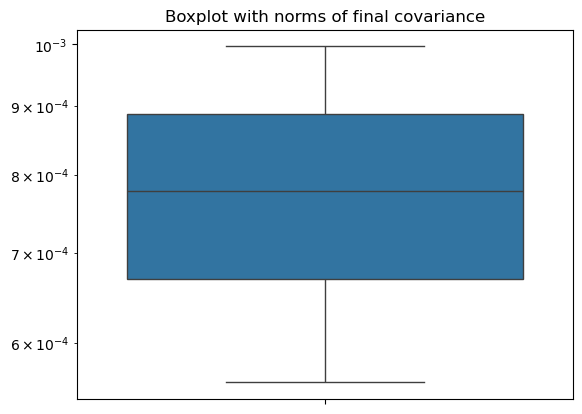

In [19]:
sns.boxplot(y=final_cov_norm)
plt.yscale("log")
plt.title("Boxplot with norms of final covariance")
plt.show()

In [20]:
final_estimates = jax.vmap((lambda a, b: a[b]), in_axes=(0, 0))(
    run_results.estimates_array, run_results.iteration
)

In [21]:
df = pd.DataFrame(final_estimates, columns=["par1", "par2", "par3", "par4"])

df_true_pars = pd.DataFrame(
    true_parameters[np.newaxis, :], columns=["par1", "par2", "par3", "par4"]
)

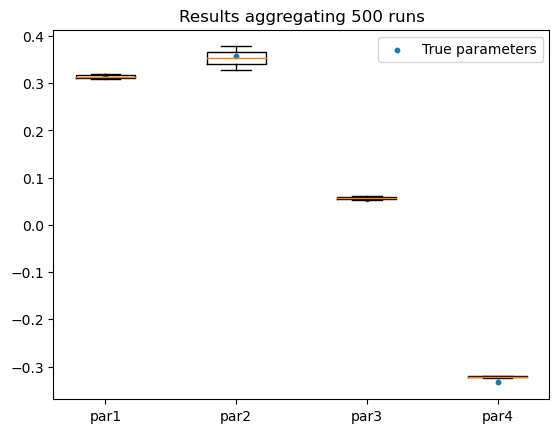

In [22]:
plt.style.use("default")
colnames = ["par1", "par2", "par3", "par4"]
plt.boxplot(df, labels=colnames, positions=range(len(df.columns)))
plt.scatter(
    colnames, true_parameters, label="True parameters", marker="o", s=10
)
# plt.plot(df_true_pars)
plt.title("Results aggregating 500 runs")
plt.legend()
plt.show()